We preprocess data for training

In [79]:
import pandas as pd
import os.path as op
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns

In [80]:
# DATA_DIR = '/home/totucuong/projects/thirdparty/bvi-truth-discovery/data'
DATA_DIR = '../data'

# Preprocess Population Dataset

In [81]:
population_claims = pd.read_csv(op.join(DATA_DIR, 'population/population_claims.csv'))
claims = population_claims.copy()
population_truths = pd.read_csv(op.join(DATA_DIR, 'population/population_truth.csv'))
truths = population_truths.copy()

Not all the claims has their corresponding truths. We need to filter them out

In [82]:
claims['object'] = claims.ObjectID.apply(lambda x: x.replace(',', '_').replace(' ', '')) + '_' + claims.PropertyID
claims['value'] = claims.PropertyValue
claims.drop(columns=['ObjectID', 'PropertyID', 'PropertyValue', 'TimeStamp'], inplace=True)

In [83]:
truths['object'] = truths.ObjectID.apply(lambda x: x.replace(',', '_').replace(' ', '')) + '_' + truths.PropertyID
truths['value'] = truths.PropertyValue
truths.drop(columns=['ObjectID', 'PropertyID', 'PropertyValue'], inplace=True)

### drop duplicates

In [84]:
claims.drop_duplicates().shape, claims.shape

((49953, 3), (49955, 3))

In [85]:
truths.drop_duplicates().shape, truths.shape

((308, 2), (308, 2))

In [86]:
claims.drop_duplicates(inplace=True)
claims.shape

(49953, 3)

### We discover that not all truth has corresponding claims

In [87]:
truths[truths.object=='st.joseph_missouri_Population2000'].shape[0], claims[claims.object == 'st.joseph_missouri_Population2000'].shape[0]

(1, 0)

In [88]:
object_with_claims_and_truth = list(set(claims.object).intersection(set(truths.object)))

In [89]:
truths = truths.set_index('object').loc[object_with_claims_and_truth].reset_index()

In [90]:
claims = claims.set_index('object').loc[object_with_claims_and_truth].reset_index()

In [91]:
truths.shape, claims.shape

((301, 2), (1046, 3))

## At least 2 different claims for each object

In [92]:
mask = claims.groupby(['object']).nunique().value < 2
object_with_single_value = list(claims.groupby(['object']).nunique().value[mask].index)

In [93]:
claims = claims.set_index('object').drop(object_with_single_value).reset_index()
truths = truths.set_index('object').drop(object_with_single_value).reset_index()

### Data Encoding

In [94]:
object_le = LabelEncoder()
claims['object_id'] = object_le.fit_transform(claims.object)

In [95]:
truths['object_id'] = object_le.transform(truths.object)

Now we encode source id

In [96]:
source_le = LabelEncoder()

In [97]:
claims['source_id'] = source_le.fit_transform(claims.SourceID)

we also encode object id

In [98]:
import pickle

In [99]:
with open(op.join(DATA_DIR, 'population/object_le.pkl'), 'wb') as f:
    pickle.dump(object_le, f)
with open(op.join(DATA_DIR, 'population/source_le.pkl'), 'wb') as f:
    pickle.dump(source_le, f)

So we need to keep only objects that have both claims and truth.

### Saving data

In [100]:
truths.to_csv(op.join(DATA_DIR, 'population/truths.csv'), index=False)

In [101]:
claims.to_csv(op.join(DATA_DIR, 'population/claims.csv'), index=False)

In [102]:
truths.shape, claims.shape

((293, 3), (1035, 5))

# Distribution of number of claims per object

In [103]:
claims.shape, truths.shape

((1035, 5), (293, 3))

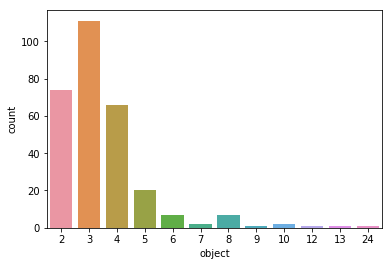

In [104]:
sns.countplot(claims.object.value_counts())

In [105]:
claims[claims.object=='lima_ohio_Population2000']

,object,SourceID,value,object_id,source_id
422,lima_ohio_Population2000,3922229: Hmwith,40081,134,501
423,lima_ohio_Population2000,0 (59.100.77.217),40081000,134,116
424,lima_ohio_Population2000,5512121: CapitalBot,40081,134,555


In [106]:
truths[truths.object == 'lima_ohio_Population2000']

,object,value,object_id
119,lima_ohio_Population2000,40081,134


In [107]:
claims[claims.object == 'lima_ohio_Population2000']

,object,SourceID,value,object_id,source_id
422,lima_ohio_Population2000,3922229: Hmwith,40081,134,501
423,lima_ohio_Population2000,0 (59.100.77.217),40081000,134,116
424,lima_ohio_Population2000,5512121: CapitalBot,40081,134,555


In [108]:
source_le.inverse_transform(claims.source_id[:10])

array(['5512121: CapitalBot', '1960810: Nyttend',
       '104574: ArkansasTraveler', '0 (74.227.33.192)',
       '0 (72.147.247.16)', '0 (216.79.147.254)', '0 (76.22.128.8)',
       '5512121: CapitalBot', '0 (76.22.133.58)', '393711: Tyrenius'],
      dtype=object)

In [109]:
truths.shape, claims.shape

((293, 3), (1035, 5))